# Machine Learning Projects Portofolio
### Ketentuan Tugas :
1. Dibebaskan untuk men-download Dataset dari Kaggle atau sumber data lainnya, pilih untuk kasus supervised atau unsupervised.
2. Buatlah End to end project Machine Learning di local jupyter notebook / Google Collaboratory.
3. Ganti nama file : template_pr_day10.ipynb  dengan PR_day10_nama_siswa.ipynb
4. Upload Dataset yang digunakan ke Kaggle
5. Upload file code dan ppt (jika ada) ke dalam github repository + file readme pada github.
6. Tugas ini bersifat individu, dikumpulkan ke LMS dalam bentuk **link githubnya saja**.

# Import Library

In [80]:
#Import libraries and dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import gdown
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [81]:
!pip install tensorflow

In [82]:
!pip install pmdarima

#Background


We aim to examine and predict the occupancy of Hotel ABC, and we seek to provide pricing suggestions derived from their past performance, demand trends, and rates of competitors for February 2024.

## Data Dictionary


- Day: The day of the month.
- Date: The date.
- Seasonality: Indicates the seasonality of the data.
- Rooms_Available: The number of rooms available.
- Occupancy: The occupancy rate.
- Room_Night_OTB: The number of room nights sold or On The Book.
- Revenue: The revenue generated.
- ADR: Average Daily Rate.
- Lowest_Rates: The lowest rate.
- Competitor_1 to Competitor_10: Competitors' rates.


#Import Date & Exploratory Data Analytics

In [58]:
#Extract Data from Gdrive and table
url = "https://drive.google.com/file/d/1pzcLQcpQd18OBsf4NR9Wb-iu5SpAGYQG/view?usp=drive_link"
output = "PR_Day10_XYZ Hotel - XYZ.pickle"
gdown.download(url, output, quiet=False, fuzzy=True)
df_hotelxyz = pd.read_csv('/content/PR_Day10_XYZ Hotel - XYZ.pickle')
df_hotelxyz.head(10)

Downloading...
From: https://drive.google.com/uc?id=1pzcLQcpQd18OBsf4NR9Wb-iu5SpAGYQG
To: /content/PR_Day10_XYZ Hotel - XYZ.pickle
100%|██████████| 40.5k/40.5k [00:00<00:00, 29.1MB/s]


,Date,Day,Seasonality,Rooms Available,Occupancy,Room Night OTB,Revenue,ADR,Lowest Rates,Competitor 1,...,Competitor 3,Competitor 4,Competitor 5,Competitor 6,Competitor 7,Competitor 8,Competitor 9,Competitor 10,Search Demand This Year (City),Search Demand Previous Year (City)
0,1 Jan 2024,Mon,New Year,29,100%,29,"2,704.7",93.3,91.7,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,"2,941.1","2,929.5"
1,2 Jan 2024,Tue,NaN,29,97%,28,"1,776.7",63.5,47.7,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,"2,941.1","2,929.5"
2,3 Jan 2024,Wed,NaN,29,100%,29,"1,561.4",53.8,34.8,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,"2,941.1","2,929.5"
3,4 Jan 2024,Thu,NaN,28,100%,28,"1,283.4",45.8,34.8,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,"2,941.1","2,929.5"
4,5 Jan 2024,Fri,NaN,29,76%,22,854.4,38.8,34.8,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,"2,941.1","2,929.5"
5,6 Jan 2024,Sat,NaN,28,96%,27,"1,096.4",40.6,34.8,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,"2,941.1","2,929.5"
6,7 Jan 2024,Sun,NaN,29,69%,20,772.9,38.6,34.8,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,"2,941.1","2,929.5"
7,8 Jan 2024,Mon,NaN,29,48%,14,596.9,42.6,34.8,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,"2,941.1","2,929.5"
8,9 Jan 2024,Tue,NaN,29,59%,17,680.0,40.0,34.8,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,"2,941.1","2,929.5"
9,10 Jan 2024,Wed,NaN,29,66%,19,736.9,38.8,34.8,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,"2,941.1","2,929.5"


- Ensure appropriate data types for each column. For example, 'Date' should be converted to a datetime data type, and 'Occupancy', 'Search Demand Previous Year (City)','Search Demand This Year (City)', Competitor Rates, 'Revenue'might need to be converted to a numeric type.
- Avoid spaces or special characters, which can sometimes cause issues when accessing columns.
- Null found on seasonality no need to be clean, however 'Seasonality' represents different seasons, consider encoding it as categorical variables for analysis.
-  Convert categorical variables like 'Day' to a categorical data type for better memory usage and performance.

In [59]:
# Replace Space( ) with Underscore (_)
df_hotelxyz.columns = df_hotelxyz.columns.str.replace(' ', '_')

# Check the updated column names
print(df_hotelxyz.columns)

Index(['Date', 'Day', 'Seasonality', 'Rooms_Available', 'Occupancy',
       'Room_Night_OTB', 'Revenue', 'ADR', 'Lowest_Rates', 'Competitor_1',
       'Competitor_2', 'Competitor_3', 'Competitor_4', 'Competitor_5',
       'Competitor_6', 'Competitor_7', 'Competitor_8', 'Competitor_9',
       'Competitor_10', 'Search_Demand_This_Year_(City)',
       'Search_Demand_Previous_Year_(City)'],
      dtype='object')


In [60]:
# Drop unnecessary columns
df_hotelxyz = df_hotelxyz.drop(['Search_Demand_This_Year_(City)', 'Search_Demand_Previous_Year_(City)'], axis=1)


In [61]:
df_hotelxyz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             366 non-null    object 
 1   Day              366 non-null    object 
 2   Seasonality      28 non-null     object 
 3   Rooms_Available  366 non-null    int64  
 4   Occupancy        366 non-null    object 
 5   Room_Night_OTB   366 non-null    int64  
 6   Revenue          366 non-null    object 
 7   ADR              366 non-null    float64
 8   Lowest_Rates     366 non-null    object 
 9   Competitor_1     366 non-null    object 
 10  Competitor_2     366 non-null    object 
 11  Competitor_3     366 non-null    object 
 12  Competitor_4     366 non-null    object 
 13  Competitor_5     366 non-null    object 
 14  Competitor_6     366 non-null    object 
 15  Competitor_7     366 non-null    object 
 16  Competitor_8     366 non-null    object 
 17  Competitor_9    

In [62]:
#Check the missing value handling
for column in df_hotelxyz:
    print(f"============= {column} =================")
    display(df_hotelxyz[column].value_counts())
    print()

============= Date =================


1 Jan 2024     1
8 Sep 2024     1
6 Sep 2024     1
5 Sep 2024     1
4 Sep 2024     1
              ..
30 Apr 2024    1
29 Apr 2024    1
28 Apr 2024    1
27 Apr 2024    1
31 Dec 2024    1
Name: Date, Length: 366, dtype: int64


============= Day =================


Mon    53
Tue    53
Wed    52
Thu    52
Fri    52
Sat    52
Sun    52
Name: Day, dtype: int64


============= Seasonality =================


Eid Al-Fitr             6
New Year                2
Maulid Nabi Muhammad    2
Christmas               2
CNY                     2
Nyepi                   1
Day 1 Fasting           1
Good Friday             1
Easter                  1
Election                1
Isra Mi'raj             1
Ascension Day           1
Vesak Day               1
Pancasila Day           1
Idul Adha               1
Islamic New Year        1
Independence Day        1
Diwali                  1
Labour Day              1
Name: Seasonality, dtype: int64


============= Rooms_Available =================


30    316
29     37
28      9
27      3
26      1
Name: Rooms_Available, dtype: int64


============= Occupancy =================


0%      258
3%       29
7%       11
13%       9
66%       7
10%       6
100%      6
59%       4
76%       3
48%       3
86%       3
97%       2
11%       2
69%       2
14%       2
31%       2
93%       2
72%       2
90%       1
41%       1
54%       1
44%       1
30%       1
45%       1
55%       1
20%       1
89%       1
32%       1
28%       1
17%       1
96%       1
Name: Occupancy, dtype: int64


============= Room_Night_OTB =================


0     258
1      29
2      11
4      11
3       8
19      7
17      4
28      4
9       4
22      3
27      3
14      3
25      3
26      3
21      2
29      2
12      2
20      2
15      1
16      1
6       1
8       1
5       1
24      1
13      1
Name: Room_Night_OTB, dtype: int64


============= Revenue =================


0.0      258
42.0       6
44.8       5
89.5       5
47.5       3
        ... 
751.8      1
495.1      1
555.7      1
534.1      1
150.7      1
Name: Revenue, Length: 84, dtype: int64


============= ADR =================


0.0     258
44.8     10
42.0      6
40.6      4
39.2      4
       ... 
39.8      1
44.6      1
63.5      1
43.5      1
43.4      1
Name: ADR, Length: 68, dtype: int64


============= Lowest_Rates =================


42.4       215
48.4        82
34.8        37
3,666.7     12
75.6         8
84.7         4
36.7         3
38.5         2
91.7         1
47.7         1
40.3         1
Name: Lowest_Rates, dtype: int64


============= Competitor_1 =================


48.5    246
54.2     53
48.6     31
42.8     17
39.9      9
33.3      5
44.4      3
SOLD      2
Name: Competitor_1, dtype: int64


============= Competitor_2 =================


86.8     180
93.7      72
79.9      43
89.8      31
82.6       7
85.4       7
107.4      7
148.8      7
70.2       5
118.5      2
179.1      2
143.3      2
SOLD       1
Name: Competitor_2, dtype: int64


============= Competitor_3 =================


33.1    203
31.7     59
32.6     31
33.9     24
28.2     20
SOLD     15
25.2      5
46.3      5
29.1      3
34.8      1
Name: Competitor_3, dtype: int64


============= Competitor_4 =================


62.3    114
69.2     49
60.7     33
64.7     31
72.4     20
58.9     15
60.9     14
59.1     14
66.6      7
67.8      6
SOLD      6
63.6      6
61.8      5
53.6      5
64.2      5
64.5      4
67.1      4
82.4      4
70.0      4
59.8      4
78.6      3
98.5      2
80.6      2
68.9      2
70.9      2
81.1      2
73.4      1
69.1      1
65.5      1
Name: Competitor_4, dtype: int64


============= Competitor_5 =================


48.6     193
51.8      62
51.4      31
51.7      23
50.5      16
55.7      11
46.5       6
41.4       5
60.7       4
146.0      4
54.5       2
67.5       2
SOLD       2
58.3       2
103.3      2
53.7       1
Name: Competitor_5, dtype: int64


============= Competitor_6 =================


48.5    246
69.7     64
53.5     31
54.5      7
84.8      7
40.3      5
60.6      4
SOLD      2
Name: Competitor_6, dtype: int64


============= Competitor_7 =================


41.9     189
70.4      71
47.5      31
34.7      23
33.8      19
53.4       7
36.2       6
SOLD       6
32.9       5
45.3       2
36.8       2
56.3       2
81.5       1
35.7       1
112.0      1
Name: Competitor_7, dtype: int64


============= Competitor_8 =================


63.0     149
82.7      54
72.0      31
66.2      17
61.1      12
60.4       7
68.2       7
107.7      7
55.3       7
89.6       6
70.8       5
88.1       5
74.1       5
80.4       4
62.3       4
86.8       4
89.1       4
65.7       3
65.8       3
SOLD       3
59.6       3
65.4       3
99.2       2
76.4       2
71.3       2
85.1       2
74.7       2
75.4       2
117.2      2
192.3      2
71.6       1
140.4      1
96.6       1
73.5       1
148.0      1
115.7      1
178.5      1
Name: Competitor_8, dtype: int64


============= Competitor_9 =================


23.6    163
26.2     62
20.9     45
SOLD     34
24.1     31
30.2     19
18.4      5
26.9      3
28.0      2
22.0      2
Name: Competitor_9, dtype: int64


============= Competitor_10 =================


97.0     106
90.9      66
114.6     35
110.1     31
93.9      30
84.8      14
160.6     14
142.4     13
190.9     12
130.3     11
175.8      8
145.5      6
91.2       5
106.1      5
200.0      4
125.3      3
SOLD       2
103.0      1
Name: Competitor_10, dtype: int64

- Found SOLD Value on Competitor Rates on ['Competitor_3', 'Competitor_4', 'Competitor_7', 'Competitor_9']-> Handle by using Mean value
- Convert columns like 'Date' to datetime objects for better handling of date-related operations.
- Null values on seasonlity can be ignore as it's optional
- If columns represent numerical values, consider converting them to appropriate numeric types (e.g., float) for analysis.
- Convert categorical variables like 'Day' to a categorical data type for better memory usage and performance.

In [66]:
# Convert 'Date' column to datetime data type
df_hotelxyz['Date'] = pd.to_datetime(df_hotelxyz['Date'])

# Convert percentage columns to numeric types
percentage_columns = ['Occupancy']
for column in percentage_columns:
    if df_hotelxyz[column].dtype == 'object':
        df_hotelxyz[column] = df_hotelxyz[column].str.rstrip('%').astype(float)

# Convert columns to numeric types
numeric_columns = ['Revenue', 'Lowest_Rates','ADR']

# Convert to numeric type
for column in numeric_columns:
    df_hotelxyz[column] = pd.to_numeric(df_hotelxyz[column], errors='coerce')

# Replace null values with mean
for column in numeric_columns:
    # For percentage data, fill null values with mean (assuming values are between 0 and 100)
    mean_value = df_hotelxyz[column].mean()
    df_hotelxyz[column].fillna(mean_value, inplace=True)

# Replace 'SOLD' values with mean in competitor columns
competitor_columns = ['Competitor_1', 'Competitor_2', 'Competitor_3', 'Competitor_4', 'Competitor_5', 'Competitor_6', 'Competitor_7', 'Competitor_8', 'Competitor_9', 'Competitor_10']
for column in competitor_columns:
    df_hotelxyz[column].replace('SOLD', pd.NA, inplace=True)
    df_hotelxyz[column] = pd.to_numeric(df_hotelxyz[column], errors='coerce')
    df_hotelxyz[column].fillna(df_hotelxyz[column].mean(), inplace=True)

# Check the updated DataFrame
print(df_hotelxyz.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             366 non-null    datetime64[ns]
 1   Day              366 non-null    object        
 2   Seasonality      28 non-null     object        
 3   Rooms_Available  366 non-null    int64         
 4   Occupancy        366 non-null    float64       
 5   Room_Night_OTB   366 non-null    int64         
 6   Revenue          366 non-null    float64       
 7   ADR              366 non-null    float64       
 8   Lowest_Rates     366 non-null    float64       
 9   Competitor_1     366 non-null    float64       
 10  Competitor_2     366 non-null    float64       
 11  Competitor_3     366 non-null    float64       
 12  Competitor_4     366 non-null    float64       
 13  Competitor_5     366 non-null    float64       
 14  Competitor_6     366 non-null    float64  

In [67]:
#Check the column for Seasonality and Day
for column in ["Seasonality"]:
    print(f"============= {column} =================")
    display(df_hotelxyz[column].value_counts())
    print()

for column in ["Day"]:
    print(f"============= {column} =================")
    display(df_hotelxyz[column].value_counts())
    print()

============= Seasonality =================


Eid Al-Fitr             6
New Year                2
Maulid Nabi Muhammad    2
Christmas               2
CNY                     2
Nyepi                   1
Day 1 Fasting           1
Good Friday             1
Easter                  1
Election                1
Isra Mi'raj             1
Ascension Day           1
Vesak Day               1
Pancasila Day           1
Idul Adha               1
Islamic New Year        1
Independence Day        1
Diwali                  1
Labour Day              1
Name: Seasonality, dtype: int64


============= Day =================


Mon    53
Tue    53
Wed    52
Thu    52
Fri    52
Sat    52
Sun    52
Name: Day, dtype: int64

In [68]:
#Label Encoder for Day
from sklearn.preprocessing import LabelEncoder

# Day mapping
day_mapping = {
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7
}

# Create a new column 'Encoded_Day' to store the encoded values
df_hotelxyz['Encoded_Day'] = df_hotelxyz['Day'].map(day_mapping)

# Check the unique values to ensure encoding is correct
print(df_hotelxyz['Encoded_Day'].unique())


[1 2 3 4 5 6 7]


In [69]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Seasonality' column to encode seasonality events
df_hotelxyz['Encoded_Seasonality'] = label_encoder.fit_transform(df_hotelxyz['Seasonality'])

# Check the unique values to ensure encoding is correct
print(df_hotelxyz['Encoded_Seasonality'].unique())



[15 19 12  1  7 16  3  8  5  6 13  0 18 17  9 11 10 14  4  2]


In [70]:
df_hotelxyz.head(15)

,Date,Day,Seasonality,Rooms_Available,Occupancy,Room_Night_OTB,Revenue,ADR,Lowest_Rates,Competitor_1,...,Competitor_3,Competitor_4,Competitor_5,Competitor_6,Competitor_7,Competitor_8,Competitor_9,Competitor_10,Encoded_Day,Encoded_Seasonality
0,2024-01-01,Mon,New Year,29,100.0,29,88.621629,93.3,91.7,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,1,15
1,2024-01-02,Tue,NaN,29,97.0,28,88.621629,63.5,47.7,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,2,19
2,2024-01-03,Wed,NaN,29,100.0,29,88.621629,53.8,34.8,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,3,19
3,2024-01-04,Thu,NaN,28,100.0,28,88.621629,45.8,34.8,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,4,19
4,2024-01-05,Fri,NaN,29,76.0,22,854.400000,38.8,34.8,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,5,19
5,2024-01-06,Sat,NaN,28,96.0,27,88.621629,40.6,34.8,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,6,19
6,2024-01-07,Sun,NaN,29,69.0,20,772.900000,38.6,34.8,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,7,19
7,2024-01-08,Mon,NaN,29,48.0,14,596.900000,42.6,34.8,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,1,19
8,2024-01-09,Tue,NaN,29,59.0,17,680.000000,40.0,34.8,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,2,19
9,2024-01-10,Wed,NaN,29,66.0,19,736.900000,38.8,34.8,48.6,...,32.6,64.7,51.4,53.5,47.5,72.0,24.1,110.1,3,19


# Sarimax

                 Rooms_Available  Occupancy  Room_Night_OTB   Revenue  \
Rooms_Available         1.000000  -0.819733       -0.806878 -0.622871   
Occupancy              -0.819733   1.000000        0.999512  0.792341   
Room_Night_OTB         -0.806878   0.999512        1.000000  0.800379   
Revenue                -0.622871   0.792341        0.800379  1.000000   
ADR                    -0.521763   0.621950        0.628206  0.562732   
Lowest_Rates            0.260269  -0.254698       -0.255022 -0.315266   
Competitor_1            0.366469  -0.395034       -0.397296 -0.434264   
Competitor_2           -0.117829   0.026422        0.018526 -0.088370   
Competitor_3            0.216948  -0.256273       -0.260385 -0.325984   
Competitor_4           -0.198127   0.075102        0.067844 -0.015318   
Competitor_5           -0.023023  -0.010063       -0.011704 -0.030291   
Competitor_6            0.012717  -0.055507       -0.058789 -0.103502   
Competitor_7            0.093620  -0.108431       -

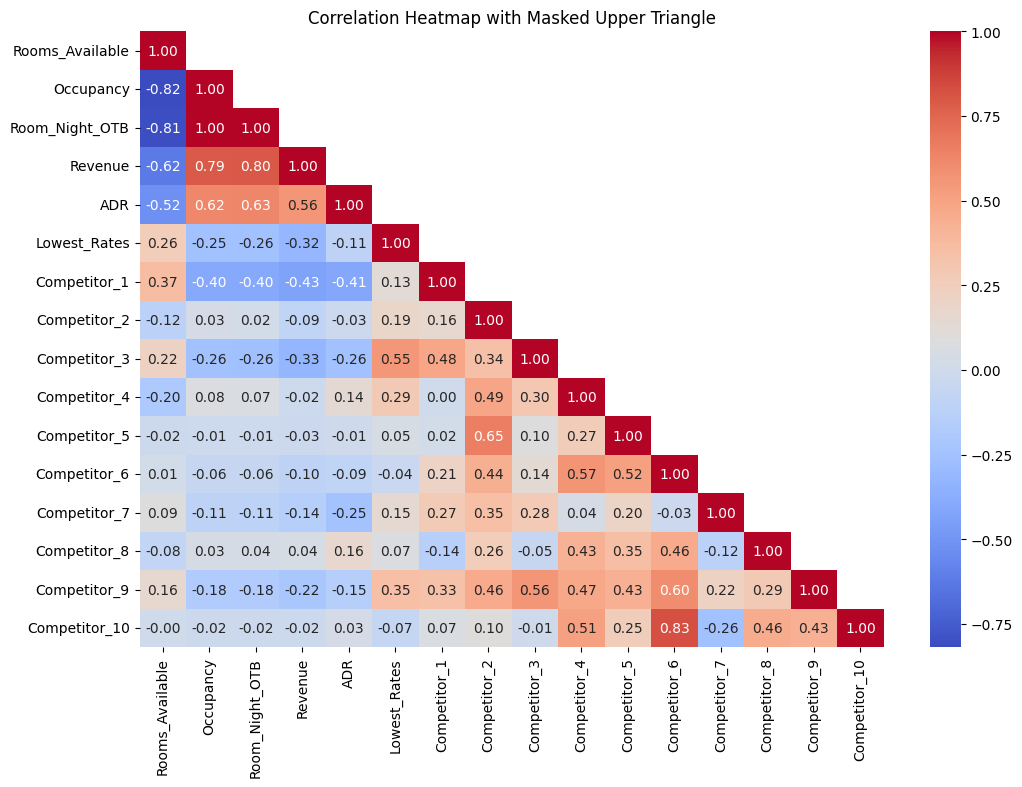

In [98]:
import pandas as pd

# Selecting relevant columns for correlation analysis
selected_columns = ['Rooms_Available', 'Occupancy', 'Room_Night_OTB', 'Revenue',
                    'ADR', 'Lowest_Rates', 'Competitor_1',
                    'Competitor_2', 'Competitor_3', 'Competitor_4', 'Competitor_5',
                    'Competitor_6', 'Competitor_7', 'Competitor_8', 'Competitor_9',
                    'Competitor_10']

# Creating a DataFrame with selected columns
selected_data = df_hotelxyz[selected_columns]

# Calculating the correlation matrix
correlation_matrix = selected_data.corr()

# Mask upper triangle values
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

print(correlation_matrix)
# Set upper triangle values to NaN
correlation_matrix_masked = correlation_matrix.where(mask)

# Create a heatmap with masked upper triangle
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_masked, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Masked Upper Triangle')
plt.show()





Mean Squared Error: 41.01189394333135


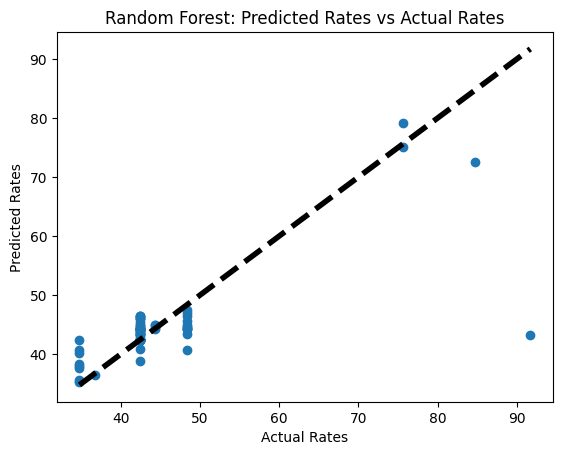

Random Forest Model Summary
------------------
Mean Squared Error: 41.01189394333135
R-squared: 0.564557956556478
------------------
Feature Importances:
Rooms_Available : 0.07943457244964634
Occupancy : 0.05349758071070788
Room_Night_OTB : 0.02791015620411648
Revenue : 0.042763630778076586
ADR : 0.030906226194604258
Competitor_1 : 0.012084464597503902
Competitor_2 : 0.0356844103149824
Competitor_3 : 0.24482248184807318
Competitor_4 : 0.32916577682685555
Competitor_5 : 0.017538941669915455
Competitor_6 : 0.00803908954584186
Competitor_7 : 0.03525665961582316
Competitor_8 : 0.018749229514079237
Competitor_9 : 0.049397290233871516
Competitor_10 : 0.01474948949590237


In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Feature Selection
selected_features = ['Rooms_Available', 'Occupancy', 'Room_Night_OTB', 'Revenue', 'ADR',
                     'Competitor_1', 'Competitor_2', 'Competitor_3', 'Competitor_4',
                     'Competitor_5', 'Competitor_6', 'Competitor_7', 'Competitor_8',
                     'Competitor_9', 'Competitor_10']

X = df_hotelxyz[['Rooms_Available', 'Occupancy', 'Room_Night_OTB', 'Revenue', 'ADR',
        'Competitor_1', 'Competitor_2', 'Competitor_3', 'Competitor_4',
        'Competitor_5', 'Competitor_6', 'Competitor_7', 'Competitor_8',
        'Competitor_9', 'Competitor_10']]
y = df_hotelxyz['Lowest_Rates']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the predicted rates against the actual rates
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Rates')
plt.ylabel('Predicted Rates')
plt.title('Random Forest: Predicted Rates vs Actual Rates')
plt.show()

# Print a summary of the Random Forest model
print('Random Forest Model Summary')
print('------------------')
print('Mean Squared Error:', mse)

# Calculate and print the R-squared value
r_squared = model.score(X_test, y_test)
print('R-squared:', r_squared)
print('------------------')

# Print the coefficients and other details for the Random Forest model
print('Feature Importances:')
for i, feature in enumerate(selected_features):
    print(feature, ':', model.feature_importances_[i])



In [107]:
# Assuming 'dates_to_predict' is a list of dates for which you want to make rate recommendations
dates_to_predict = ['2024-02-15', '2024-02-16', '2024-02-17', '2024-02-18','2024-05-27','2024-08-27']

# Convert dates to datetime objects
dates_to_predict = pd.to_datetime(dates_to_predict)

# Extract features for the dates to predict
features_to_predict = df_hotelxyz[df_hotelxyz['Date'].isin(dates_to_predict)][selected_features]

# Predict rates using the trained Random Forest model
predicted_rates = model.predict(features_to_predict)

# Extract actual rates for the dates to predict
actual_rates = df_hotelxyz[df_hotelxyz['Date'].isin(dates_to_predict)]['Lowest_Rates']

# Display the predicted rates along with the corresponding dates and current rates
for date, pred_rate, actual_rate in zip(dates_to_predict, predicted_rates, actual_rates):
    print(f"Date: {date}, Recommended Rate: {pred_rate}, Current Rate: {actual_rate}")


Date: 2024-02-15 00:00:00, Recommended Rate: 40.747152542372945, Current Rate: 34.8
Date: 2024-02-16 00:00:00, Recommended Rate: 40.165000000000056, Current Rate: 34.8
Date: 2024-02-17 00:00:00, Recommended Rate: 36.30600000000006, Current Rate: 34.8
Date: 2024-02-18 00:00:00, Recommended Rate: 37.07000000000007, Current Rate: 34.8
Date: 2024-05-27 00:00:00, Recommended Rate: 44.27026674795794, Current Rate: 42.4
Date: 2024-08-27 00:00:00, Recommended Rate: 44.89388095238097, Current Rate: 42.4
